<a href="https://colab.research.google.com/github/gstripling/Generative_AI/blob/main/01_11_24__05_06_adv_nlp_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fine Tuning a LLM

#Fine-Tune using Keras

#UPDATE TO PULL FILE FROM COURSE GITHUB REPO

#ALSO, IS THIS THE RIGHT DATASET GIVEN LOGISTIC REGRESSION METRICS?


In [3]:
import os

# Use matplotlib for visualizing the model
import matplotlib.pyplot as plt
# Import Pandas data processing libraries
import pandas as pd


In [4]:
if not os.path.isdir("../content/output_directory"):
    os.makedirs("../content/output_directory")

In [ ]:
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel

# Load pre-trained GPT-2 model and tokenizer
model = TFGPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Add the EOS token as the pad token
tokenizer.pad_token = tokenizer.eos_token

# Load your domain-specific data
train_data_path = '/content/advertising.csv'
with open(train_data_path, 'r', encoding='utf-8') as file:
    train_texts = file.readlines()

# Tokenize and encode the texts
input_ids = tokenizer(train_texts, return_tensors='tf', padding=True, truncation=True)

# Shift the input sequence to create target sequence
labels = tf.roll(input_ids['input_ids'], shift=-1, axis=-1)

# Create TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((dict(input_ids), labels))

# Define training parameters
batch_size = 8
num_epochs = 3
learning_rate = 5e-5

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")])

# Train the model
history = model.fit(train_dataset.shuffle(1000).batch(batch_size),
          epochs=num_epochs)


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Epoch 1/3
126/126 [==============================] - 59s 183ms/step - loss: 2.2455 - accuracy: 0.5801
Epoch 2/3
126/126 [==============================] - 24s 187ms/step - loss: 1.6539 - accuracy: 0.6344
Epoch 3/3
126/126 [==============================] - 23s 185ms/step - loss: 1.5462 - accuracy: 0.6510


In [ ]:
WRITE CODETO PLOT.

# Use matplotlib to draw the model's loss curves for training and validation
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');

KeyError: 'val_loss'

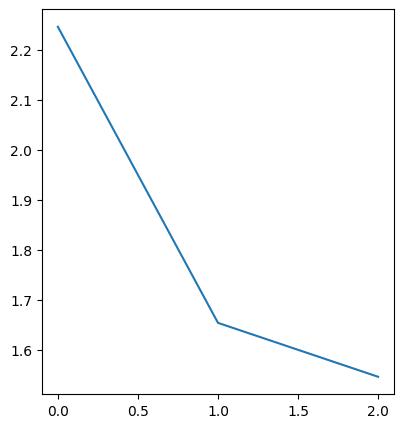

In [ ]:
plot_curves(history, ['loss', 'mse'])

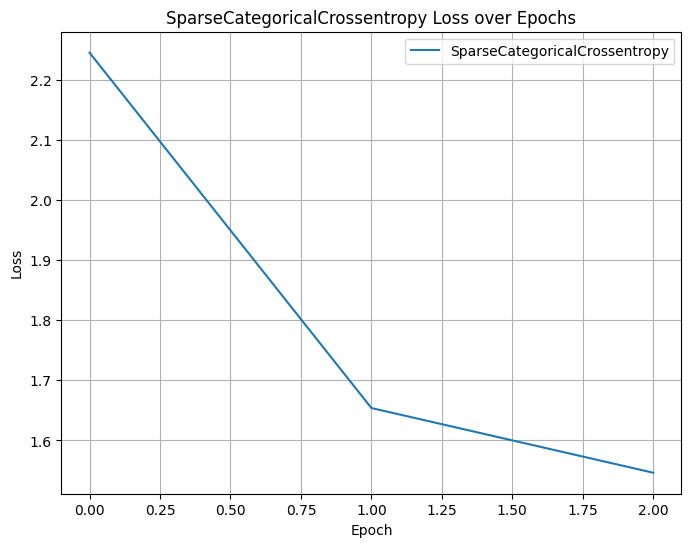

In [ ]:
# Plot the SparseCategoricalCrossentropy loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='SparseCategoricalCrossentropy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SparseCategoricalCrossentropy Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel

# Load pre-trained GPT-2 model and tokenizer
model = TFGPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Add the EOS token as the pad token
tokenizer.pad_token = tokenizer.eos_token

# Load your domain-specific data
train_data_path = '/content/kyphosis.csv'
with open(train_data_path, 'r', encoding='utf-8') as file:
    train_texts = file.readlines()

# Tokenize and encode the texts
input_ids = tokenizer(train_texts, return_tensors='tf', padding=True, truncation=True)

# Shift the input sequence to create target sequence
labels = tf.roll(input_ids['input_ids'], shift=-1, axis=-1)

# Create TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((dict(input_ids), labels))

# Define training parameters
batch_size = 8
num_epochs = 3
learning_rate = 5e-5

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")])

# Train the model
history = model.fit(train_dataset.shuffle(1000).batch(batch_size),
          epochs=num_epochs)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Epoch 1/3
11/11 [==============================] - 44s 123ms/step - loss: 3.3596 - accuracy: 0.4240
Epoch 2/3
11/11 [==============================] - 1s 132ms/step - loss: 1.6129 - accuracy: 0.6510
Epoch 3/3
11/11 [==============================] - 1s 128ms/step - loss: 1.3187 - accuracy: 0.6811


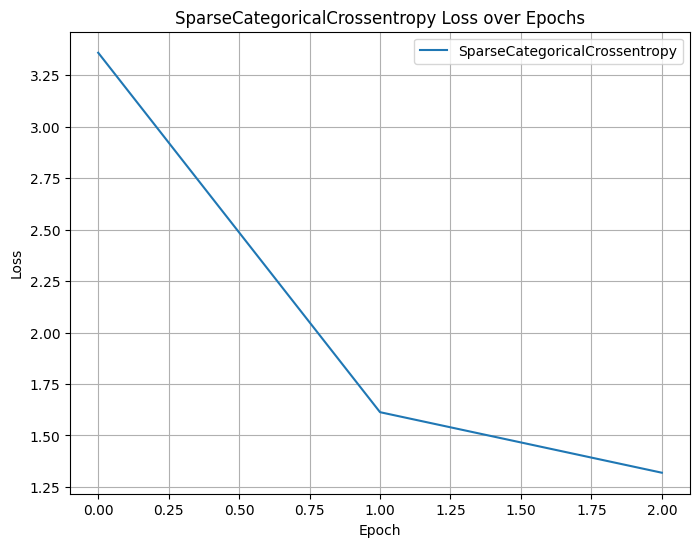

In [5]:
# Plot the SparseCategoricalCrossentropy loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='SparseCategoricalCrossentropy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SparseCategoricalCrossentropy Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()